In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Import the libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [63]:
# path='/kaggle/input/speech-dataset/BESD/ENGLISH'
# audio=[]
# labels=[]
# for classnames in os.listdir(path):
#     classdir=os.path.join(path,classnames)
#     for filename in os.listdir(classdir):
#         audio.append(os.path.join(classdir,filename))
#         a=filename.split('_')[1]
#         b=a.split(' ')[1]
#         labels.append(b)
# print(labels.shape)

## Loading the dataset

In [64]:
path='/kaggle/input/speech-dataset/BESD/ENGLISH'
audio=[]
labels=[]
for classnames in os.listdir(path):
    classdir=os.path.join(path,classnames)
    for filename in os.listdir(classdir):
        audio.append(os.path.join(classdir,filename))
        labels.append(classnames)

In [65]:
audio[:5]

['/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/8.EF_6 fear_2.wav',
 '/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/34.EM_9 fear_5.wav',
 '/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/65.EM_9 fear_2.wav',
 '/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/37.EF_9 fear_2.wav',
 '/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/64.EM_13 fear_3.wav']

In [66]:
audio[5]

'/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/27.EF_8 fear_4.wav'

In [67]:
labels[:5]

['FEAR', 'FEAR', 'FEAR', 'FEAR', 'FEAR']

In [68]:
output_directory = '/kaggle/working/DENOISED'
os.makedirs(output_directory, exist_ok=True)


In [71]:
import numpy as np
import librosa
import soundfile as sf

def estimate_noise_profile(audio, frame_length, hop_length):
    # Calculate STFT of the audio
    spec = np.abs(librosa.stft(audio, n_fft=frame_length, hop_length=hop_length))
    
    # Estimate the noise profile from the minimum energy across time
    noise_profile = np.min(spec, axis=1)
    
    return noise_profile

def spectral_subtraction(audio, noise_profile):
    # Compute the power spectra of the audio
    spec_audio = np.abs(librosa.stft(audio))

    # Trim or pad the noise profile to match the shape of spec_audio
    noise_profile_adjusted = np.pad(noise_profile, (0, spec_audio.shape[0] - len(noise_profile)), mode='edge')
    
    # Apply spectral subtraction
    denoised_spec = np.maximum(spec_audio - noise_profile_adjusted[:, np.newaxis], 0)
    
    # Inverse STFT to obtain denoised audio
    denoised_audio = librosa.istft(denoised_spec)
    
    return denoised_audio



# Parameters for estimating noise profile
frame_length = 1024  # length of the frame for STFT
hop_length = 512     # hop length for STFT

# Iterate over each audio file
for audio_path in audio:
    # Load audio
    audio1, sr_audio = librosa.load(audio_path, sr=None)
    
    # Estimate the noise profile from a portion of the audio
    noise_profile = estimate_noise_profile(audio1, frame_length, hop_length)
    
    # Perform spectral subtraction
    denoised_audio = spectral_subtraction(audio1, noise_profile)
    
    # Save denoised audio to a new file
    output_filename = os.path.basename(audio_path).replace('.wav', '_denoised.wav')
    output_path = os.path.join(output_directory, output_filename)
#     print(output_filename)
    sf.write(output_path, denoised_audio, sr_audio)


KeyboardInterrupt: 

In [ ]:
path = '/kaggle/working/DENOISED'
denoised_audio = []
denoised_labels = []

for file in os.listdir(path):
    denoised_path=os.path.join(path,file)
    denoised_audio.append(denoised_path)
    
    

In [ ]:

audio_path=denoised_audio[0]
y, sr = librosa.load(audio_path)

# Display waveform
# librosa.display.waveplot(y, sr=sr)

# Play audio
Audio(data=y, rate=sr)

In [ ]:

# audio_path =denoised_audio[0]
audio_path='/kaggle/input/speech-dataset/BESD/ENGLISH/HAPPY/6.EF_6 happy_5.wav'
y, sr = librosa.load(audio_path)

# Display waveform
# librosa.display.waveplot(y, sr=sr)

# Play audio
Audio(data=y, rate=sr)

In [70]:
denoised_audio[34:40]

array([ 4.8957433e-04,  3.1828988e-04,  2.7871210e-04,  2.0655502e-04,
        9.2008418e-07, -8.6984299e-05], dtype=float32)

## 

In [72]:
df=pd.DataFrame()
df['speech']=audio
df['labels']=labels

In [73]:
df

,speech,labels
0,/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR...,FEAR
1,/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR...,FEAR
2,/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR...,FEAR
3,/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR...,FEAR
4,/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR...,FEAR
...,...,...
2099,/kaggle/input/speech-dataset/BESD/ENGLISH/ANGE...,ANGER
2100,/kaggle/input/speech-dataset/BESD/ENGLISH/ANGE...,ANGER
2101,/kaggle/input/speech-dataset/BESD/ENGLISH/ANGE...,ANGER
2102,/kaggle/input/speech-dataset/BESD/ENGLISH/ANGE...,ANGER


In [74]:
df['labels'].value_counts()

labels
FEAR       355
NEUTRAL    350
SAD        350
DISGUST    350
HAPPY      350
ANGER      349
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [75]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveplot(data,sr=sr)
    plt.show()
    
def spectrogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

In [76]:
df['speech'][0]

'/kaggle/input/speech-dataset/BESD/ENGLISH/FEAR/8.EF_6 fear_2.wav'

In [77]:
# y: This variable represents the audio time series, 
# which is a one-dimensional array containing the amplitude of the 
# audio signal sampled at regular intervals over time. 
# Each element of the array represents the amplitude of the audio signal at a specific time point.

## FEATURE EXTRACTION

In [78]:
# Mel-Frequency Cepstral Coefficients
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=2,offset=0.2)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc


# def extract_mfcc(filename, duration=2, offset=0.2, n_mfcc=40):
#     # Load audio with librosa
#     y, sr = librosa.load(filename, duration=duration, offset=offset)
    
#     # Preprocessing: remove silence, apply log-amplitude scaling
#     y = librosa.effects.preemphasis(y)
    
#     # Extract MFCC features
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=512, n_fft=2048)
    
#     # Aggregate features (taking the mean)
#     mfcc_features = np.mean(mfcc.T, axis=0)
    
#     # Feature scaling (optional)
#     mfcc_features = (mfcc_features - np.mean(mfcc_features)) / np.std(mfcc_features)
    
#     return mfcc_features

In [79]:
# y: This variable represents the audio time series, 
# which is a one-dimensional array containing the amplitude of the 
# audio signal sampled at regular intervals over time. 
# Each element of the array represents the amplitude of the audio signal at a specific time point.

In [80]:
extract_mfcc(df['speech'][0])

array([-2.6620416e+02,  9.9052017e+01, -1.0874927e+01,  1.3626378e+01,
       -5.9794502e+00,  5.1332879e+00, -1.4717929e-01, -3.6984031e+00,
       -3.7401025e+00, -5.3287649e+00, -9.4743556e-01, -5.9713449e+00,
       -1.2406730e+01, -2.4155788e+00,  1.1343031e+00, -6.0743690e+00,
       -1.1956420e+01, -3.6315980e+00, -1.0036797e+01, -2.9645522e+00,
       -2.8822227e+00,  1.7897812e+00,  1.3118311e+00,  8.4729195e+00,
       -2.3038316e+00,  6.3803968e+00, -5.6227583e-01, -5.2275677e+00,
        1.1404912e-01,  5.0400752e-01, -5.0980890e-01,  1.3841895e+00,
       -3.2631903e+00,  1.0539787e+00, -5.5177703e+00,  8.1260908e-01,
       -3.8757691e+00,  1.1061697e+00, -2.1912000e+00, -7.8086382e-01],
      dtype=float32)

In [81]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [82]:
X_mfcc

0       [-266.20416, 99.05202, -10.874927, 13.626378, ...
1       [-231.09938, 98.90432, -26.174269, -7.5917807,...
2       [-343.91455, 105.159615, 13.864331, 18.808018,...
3       [-280.11325, 108.295616, -21.512117, 6.13201, ...
4       [-245.92015, 114.78494, 5.3640547, 16.85649, 2...
                              ...                        
2099    [-292.74957, 128.53531, -11.080603, 9.453442, ...
2100    [-350.53082, 113.94709, -10.721067, -4.473733,...
2101    [-253.81601, 107.50938, -18.261984, 17.39471, ...
2102    [-269.011, 103.84263, -11.794165, 7.3013563, 3...
2103    [-310.64517, 108.94569, -29.385807, -1.9773779...
Name: speech, Length: 2104, dtype: object

In [83]:
X=[X for X in X_mfcc]
X=np.array(X)
X.shape

(2104, 40)

In [84]:
X=np.expand_dims(X,-1)
X.shape


(2104, 40, 1)

In [85]:
X[0]

array([[-2.6620416e+02],
       [ 9.9052017e+01],
       [-1.0874927e+01],
       [ 1.3626378e+01],
       [-5.9794502e+00],
       [ 5.1332879e+00],
       [-1.4717929e-01],
       [-3.6984031e+00],
       [-3.7401025e+00],
       [-5.3287649e+00],
       [-9.4743556e-01],
       [-5.9713449e+00],
       [-1.2406730e+01],
       [-2.4155788e+00],
       [ 1.1343031e+00],
       [-6.0743690e+00],
       [-1.1956420e+01],
       [-3.6315980e+00],
       [-1.0036797e+01],
       [-2.9645522e+00],
       [-2.8822227e+00],
       [ 1.7897812e+00],
       [ 1.3118311e+00],
       [ 8.4729195e+00],
       [-2.3038316e+00],
       [ 6.3803968e+00],
       [-5.6227583e-01],
       [-5.2275677e+00],
       [ 1.1404912e-01],
       [ 5.0400752e-01],
       [-5.0980890e-01],
       [ 1.3841895e+00],
       [-3.2631903e+00],
       [ 1.0539787e+00],
       [-5.5177703e+00],
       [ 8.1260908e-01],
       [-3.8757691e+00],
       [ 1.1061697e+00],
       [-2.1912000e+00],
       [-7.8086382e-01]],

In [86]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['labels']])

In [87]:
y=y.toarray()

In [88]:
y.shape

(2104, 6)

In [89]:
y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

## Create LSTM model

In [90]:
from keras.models import Sequential
from keras.optimizers import Adagrad
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
#     Dense(256,activation='relu'),
#     Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(6,activation='softmax')
])

optimizer = Adagrad()  # Using Adagrad optimizer

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,906 (343.38 KB)

 Trainable params: 87,906 (343.38 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
history=model.fit(X,y,validation_split=0.3,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 0.2228 - loss: 1.7760 - val_accuracy: 0.0000e+00 - val_loss: 1.8437
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.2210 - loss: 1.7757 - val_accuracy: 0.0000e+00 - val_loss: 1.8471
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.2361 - loss: 1.7729 - val_accuracy: 0.0000e+00 - val_loss: 1.8504
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.2348 - loss: 1.7711 - val_accuracy: 0.0000e+00 - val_loss: 1.8537
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.2423 - loss: 1.7722 - val_accuracy: 0.0000e+00 - val_loss: 1.8569
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - accuracy: 0.2365 - loss: 1.7680 - val_accuracy: 0.0000e+00 - val_loss: 1.8603
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.2248 - loss: 1.7688 - val_accuracy: 0.0000e+00 - val_loss: 1.8634
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.2334 - loss: 1.766

## PLOT THE GRAPHS

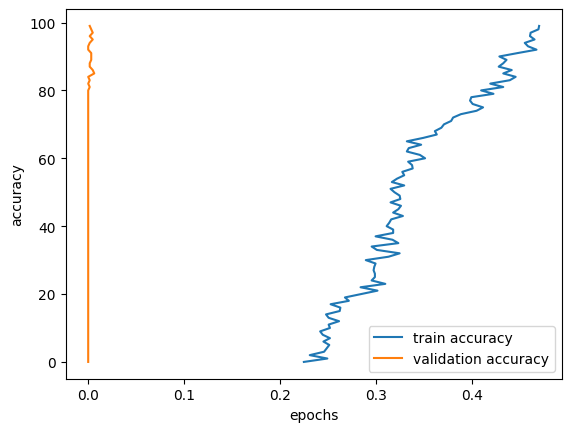

In [47]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(acc,epochs,label='train accuracy')
plt.plot(val_acc,epochs,label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import librosa
import soundfile as sf

def estimate_noise_profile(audio, frame_length, hop_length):
    # Calculate STFT of the audio
    spec = np.abs(librosa.stft(audio, n_fft=frame_length, hop_length=hop_length))
    
    # Estimate the noise profile from the minimum energy across time
    noise_profile = np.min(spec, axis=1)
    
    return noise_profile

def spectral_subtraction(audio, noise_profile):
    # Compute the power spectra of the audio
    spec_audio = np.abs(librosa.stft(audio))
    
    # Apply spectral subtraction
    denoised_spec = np.maximum(spec_audio - noise_profile[:, np.newaxis], 0)
    
    # Inverse STFT to obtain denoised audio
    denoised_audio = librosa.istft(denoised_spec)
    
    return denoised_audio

# List of audio file paths
audio_paths = ['audio_file1.wav', 'audio_file2.wav', 'audio_file3.wav']

# Parameters for estimating noise profile
frame_length = 1024  # length of the frame for STFT
hop_length = 512     # hop length for STFT

# Iterate over each audio file
for audio_path in audio_paths:
    # Load audio
    audio, sr_audio = librosa.load(audio_path, sr=None)
    
    # Estimate the noise profile from a portion of the audio
    noise_profile = estimate_noise_profile(audio, frame_length, hop_length)
    
    # Perform spectral subtraction
    denoised_audio = spectral_subtraction(audio, noise_profile)
    
    # Save denoised audio to a new file
    output_path = audio_path.replace('.wav', '_denoised.wav')
    sf.write(output_path, denoised_audio, sr_audio)
